In [55]:
#data set file is too large, use this link to access the data set: 
#https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("US_Accidents_March23.csv")

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [8]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

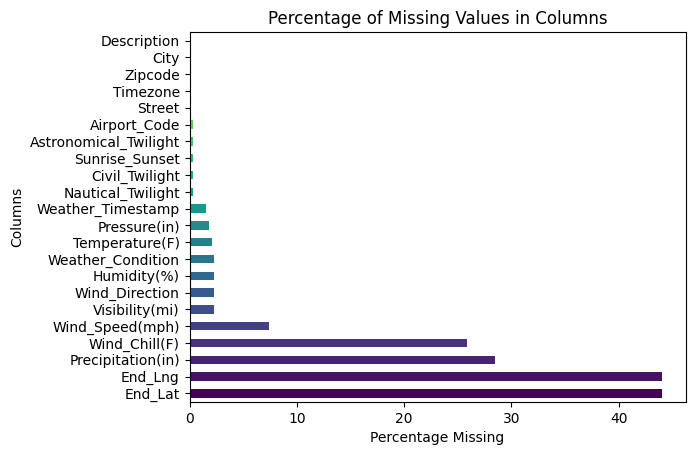

In [9]:
colors = plt.cm.viridis(np.linspace(0, 1, len(missing_percentage[missing_percentage != 0])))

missing_percentage[missing_percentage != 0].plot(kind="barh", color=colors)
plt.xlabel('Percentage Missing')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values in Columns')
plt.show()

In [10]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
cities = df.City.unique()
len(cities)

13679

In [12]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [13]:
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

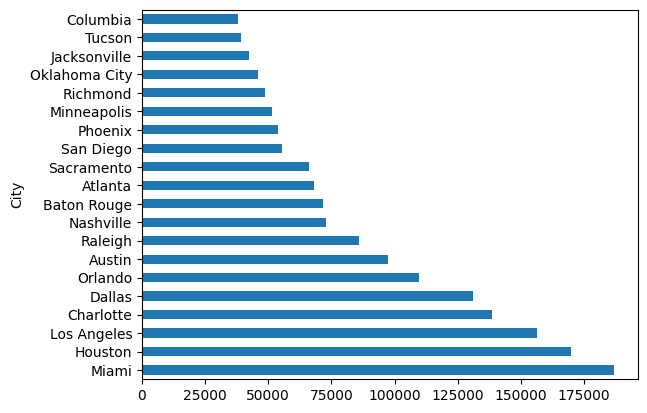

In [14]:
cities_by_accident[:20].plot(kind="barh")

In [15]:
import seaborn as sns
sns.set_style("darkgrid")

In [21]:
highest_cities_accident= cities_by_accident[cities_by_accident >=1000]
len(highest_cities_accident)

1218

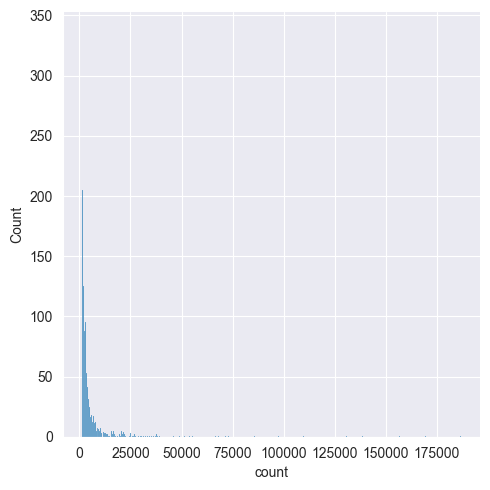

In [18]:
sns.displot(highest_cities_accident)

In [22]:
lowest_cities_accident= cities_by_accident[cities_by_accident <1000]
len(lowest_cities_accident)

12460

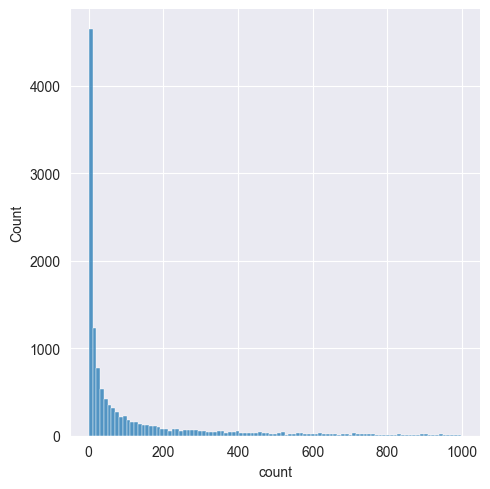

In [23]:
sns.displot(lowest_cities_accident)

<Axes: xlabel='count', ylabel='Count'>

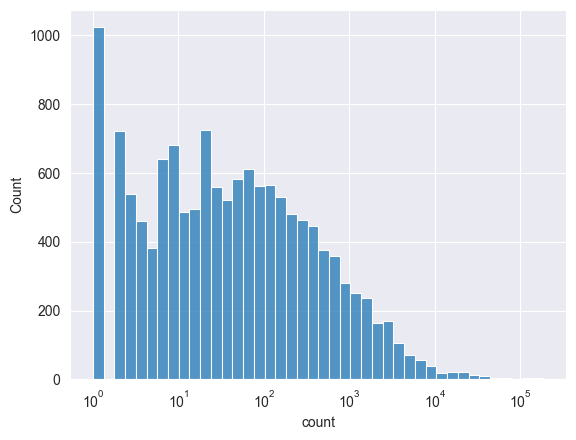

In [24]:
sns.histplot(cities_by_accident , log_scale=True)

In [25]:
cities_by_accident[cities_by_accident ==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [26]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [ ]:
#As we see the datatype of this column is "object". So, first we convert it to datetime format

In [28]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [29]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [36]:
#Now , We can easily see the Timestamp

C:\Users\Admin\AppData\Local\Temp\ipykernel_6672\1756728629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)


<Axes: xlabel='Start_Time'>

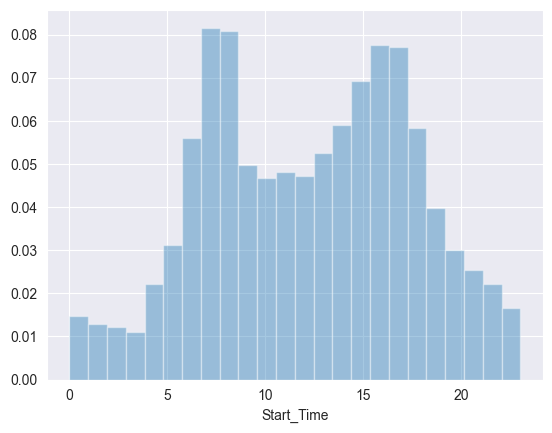

In [33]:
sns.distplot(df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)

In [ ]:
#A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)
#Next higest percentage is 3 pm to 6 pm.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6672\308908771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

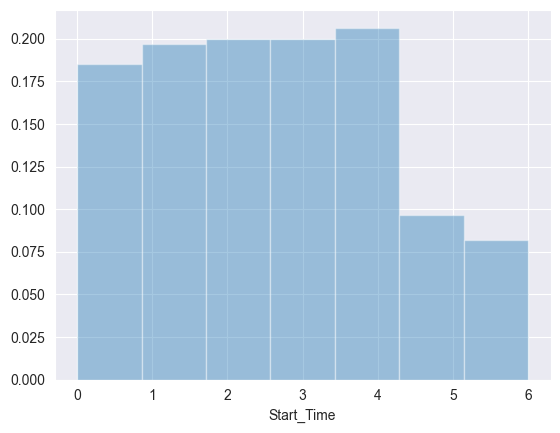

In [34]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

In [ ]:
#Is the distribution of accidents by hour the same on weekends as on weekdays?

C:\Users\Admin\AppData\Local\Temp\ipykernel_6672\3630331899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

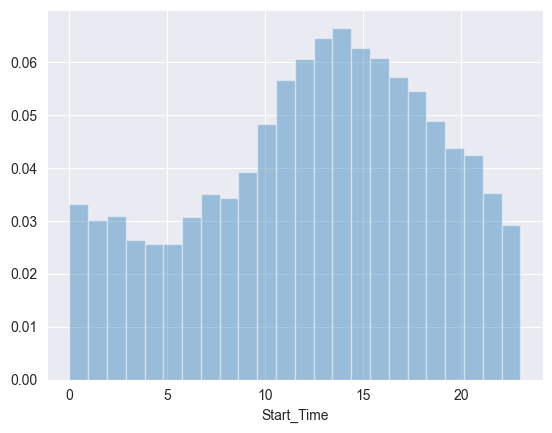

In [37]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

In [38]:
#Most of Accident on the 6th Day of week is from 9am to 6pm

C:\Users\Admin\AppData\Local\Temp\ipykernel_6672\4268565558.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

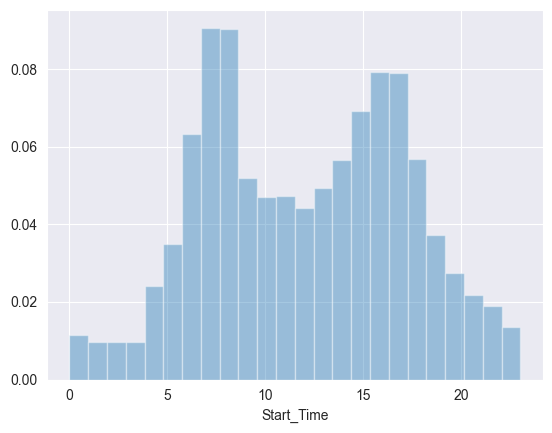

In [39]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

In [40]:
#On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

<Axes: ylabel='count'>

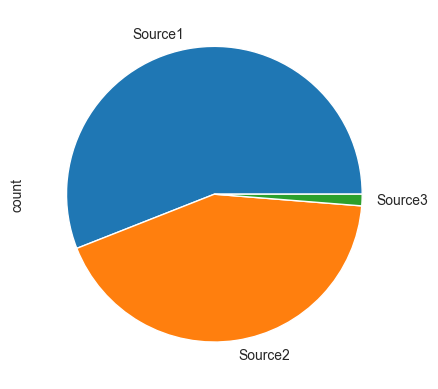

In [41]:
df.Source.value_counts().plot(kind='pie')

In [42]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [43]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

In [44]:
sample_df = df.sample(int(0.1 *len(df)))

In [45]:
#Reduce the DF Size to 1% ,just because there is a lot of points in the dataset

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

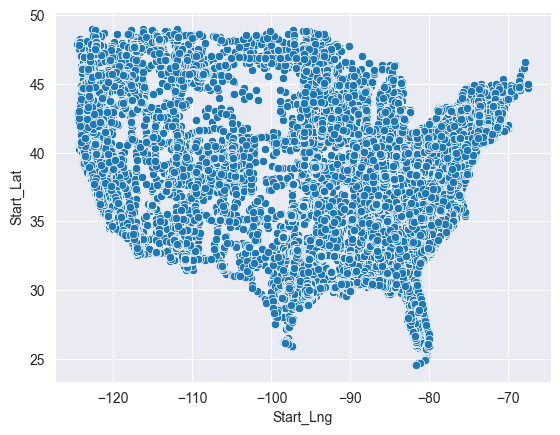

In [46]:
sns.scatterplot(x=sample_df.Start_Lng,y= sample_df.Start_Lat)

In [48]:
!pip install folium --user
import folium

  Using cached folium-0.16.0-py2.py3-none-any.whl.metadata (3.6 kB)
  Using cached branca-0.7.2-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.16.0-py2.py3-none-any.whl (100 kB)
Using cached branca-0.7.2-py3-none-any.whl (25 kB)


In [49]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [50]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x[1])

5685220    38.628762
4954374    32.923467
85504      33.780289
5220853    32.985428
1713478    40.182831
             ...    
7720210    35.112191
5036517    33.626736
4444159    42.370270
4507973    40.710812
2889587    29.816053
Name: Start_Lat, Length: 100, dtype: float64
5685220   -121.321299
4954374    -96.757694
85504     -118.090141
5220853    -80.151922
1713478    -74.722939
              ...    
7720210    -89.869720
5036517    -84.419063
4444159    -88.089780
4507973    -73.982055
2889587    -95.399483
Name: Start_Lng, Length: 100, dtype: float64


In [51]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [52]:
from folium.plugins import HeatMap

In [53]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [54]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map